<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series EDA

----

This lab will walk you through performing exploratory data analysis on a dataset of weekly chickenpox cases from Hungary. This dataset is from the UCI Machine Learning Repository. You can read more about the dataset [**here**](https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases).

-----

### Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Only using one county
pox = pd.read_csv('data/hungary_chickenpox.csv')[['Date', 'BUDAPEST']]

In [6]:
# Renaming columns for readability
pox.columns = ['date', 'budapest_cases']
pox.head(3)

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96


**Check the dataframe dtypes**

In [8]:
pox.dtypes

date              object
budapest_cases     int64
dtype: object

**Check for nulls**

In [10]:
pox.isnull().sum()

date              0
budapest_cases    0
dtype: int64

**Casting the Date column to a datetime type**

Use **pd.to_datetime** to convert the Date column to a datetime.

**WARNING**: The date column is formatted as day-month-year. Does **pd.to_datetime** work the way you expect it to on day/month/year strings? If it doesn't work the way you expect it to, check the [**documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for **pd.to_datetime**, and see if one of the settings fixes things.

In [12]:
pox['date'] = pd.to_datetime(pox['date'], format = '%d/%m/%Y')

pox.dtypes

date              datetime64[ns]
budapest_cases             int64
dtype: object

In [13]:
pox.head()

,date,budapest_cases
0,2005-01-03,168
1,2005-01-10,157
2,2005-01-17,96
3,2005-01-24,163
4,2005-01-31,122


**Set the **Date** column to be the index**

In [15]:
pox.set_index('date', inplace = True)
pox.head()

,budapest_cases
date,
2005-01-03,168
2005-01-10,157
2005-01-17,96
2005-01-24,163
2005-01-31,122


---

Now that our data is formatted appropriately, we can embark on EDA.

### Summary statistics

**What times does the dataset describe?**

That is, what's the earliest date in the dataset, and what's the latest date?

In [17]:
# min date, max date
pox.index.min(), pox.index.max()

(Timestamp('2005-01-03 00:00:00'), Timestamp('2014-12-29 00:00:00'))

**Plot a histogram of the Budapest cases column**

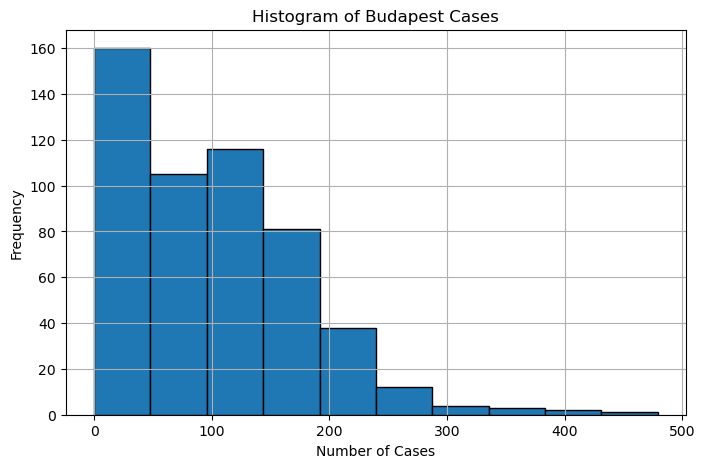

In [19]:
plt.figure(figsize = (8, 5)) 
plt.hist(pox['budapest_cases'], bins = 10, edgecolor = 'black') 
plt.title('Histogram of Budapest Cases') 
plt.xlabel('Number of Cases') 
plt.ylabel('Frequency') 
plt.grid(True) 
plt.show();

**How many cases were there per year?**

Recall that with time series data, we can't simply group by on the year. You'll need to use the [**resample**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) method on the DataFrame to answer this question.

In [21]:
pox['budapest_cases'].resample('YE-DEC').sum()

date
2005-12-31    4562
2006-12-31    6498
2007-12-31    6311
2008-12-31    4441
2009-12-31    5527
2010-12-31    5222
2011-12-31    5404
2012-12-31    5353
2013-12-31    5157
2014-12-31    4375
Freq: YE-DEC, Name: budapest_cases, dtype: int64

### Visualizations

**Make a line plot of chickenpox cases**

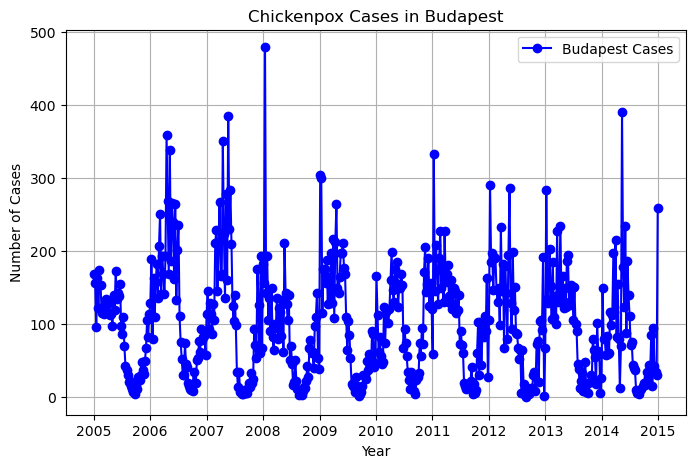

In [23]:
# Plot the line plot
plt.figure(figsize = (8, 5))
plt.plot(pox['budapest_cases'], marker = 'o', linestyle = '-', color = 'b', label = 'Budapest Cases')
plt.title('Chickenpox Cases in Budapest')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

**In short answer format, describe any apparent trends**

In [45]:
# There are repeated patterns every year.

### Plot rolling averages

Plot the weekly chickenpox cases, but on the same graph, also plot the 4-week and 12-week rolling averages.

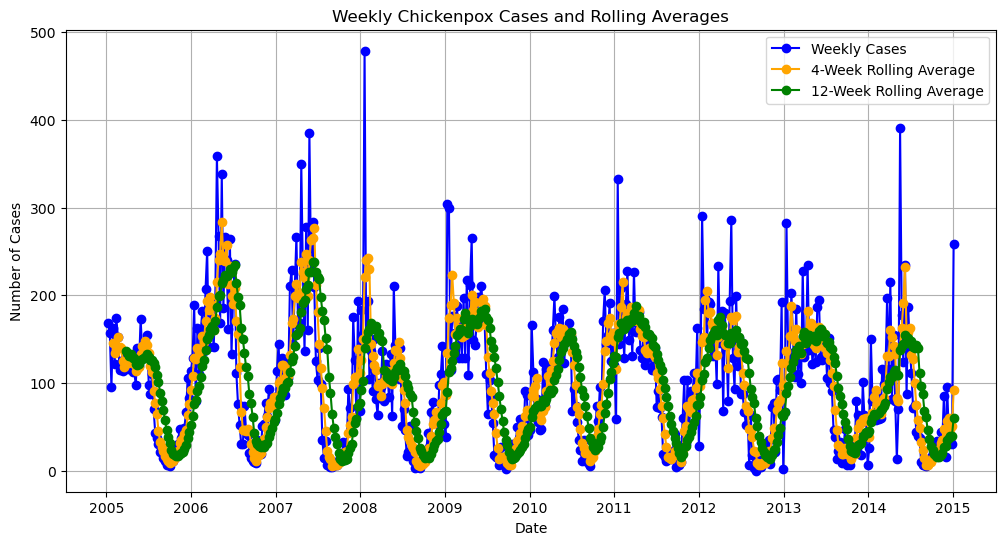

In [27]:
weekly_cases = pox['budapest_cases'].resample('W').sum()
rolling_avg_4 = weekly_cases.rolling(window=4).mean()
rolling_avg_12 = weekly_cases.rolling(window=12).mean()


plt.figure(figsize=(12, 6))
plt.plot(weekly_cases, marker = 'o', linestyle = '-', label = 'Weekly Cases', color = 'blue')
plt.plot(rolling_avg_4, marker = 'o', linestyle = '-', label = '4-Week Rolling Average', color = 'orange')
plt.plot(rolling_avg_12, marker = 'o', linestyle = '-', label = '12-Week Rolling Average', color = 'green')


plt.title('Weekly Chickenpox Cases and Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show();

### Plot yearly chickenpox cases

You may need to use [**resample**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) again for this.

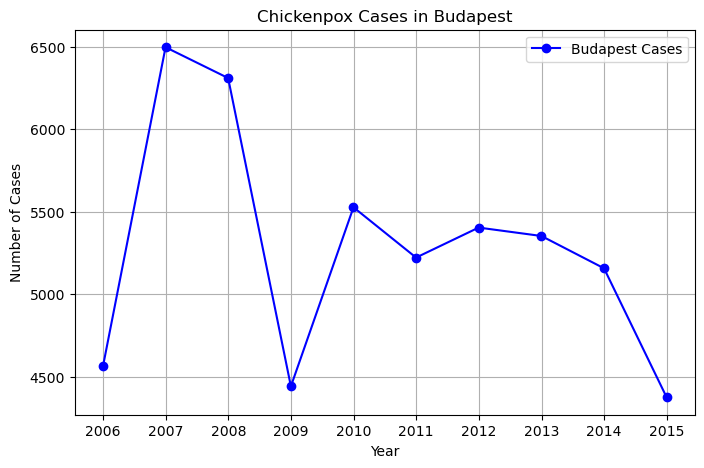

In [29]:
cases = pox['budapest_cases'].resample('YE-DEC').sum()

# Plot the line plot
plt.figure(figsize = (8, 5))
plt.plot(cases, marker = 'o', linestyle = '-', color = 'b', label = 'Budapest Cases')
plt.title('Chickenpox Cases in Budapest')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()